In [ ]:

!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rishavdash/retail-demand-forecasting-dataset

Dataset URL: https://www.kaggle.com/datasets/rishavdash/retail-demand-forecasting-dataset
License(s): ODbL-1.0
retail-demand-forecasting-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset='/content/retail-demand-forecasting-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("Retail_Dataset2.csv")

In [ ]:
df.head(5)

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [ ]:
# df1 = df.groupby(['Product_Code', 'Date'], as_index=False).agg({
#     'Order_Demand': 'sum',
#     'Open': 'first',
#     'Promo': 'first',
#     'StateHoliday': 'first',
#     'SchoolHoliday': 'first',
#     'Petrol_price': 'first'
# })

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_Type'] = df['Date'].dt.dayofweek.apply(lambda x: '1' if x >= 5 else '0')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2}
df['StateHoliday'] = df['StateHoliday'].map(state_holiday_mapping)
df['Day_Type'] = df['Day_Type'].astype(int)

In [ ]:
df1 = df.groupby(['Product_Code', 'Month', 'Year'], as_index=False).agg({
    'Order_Demand': 'sum',
    'Open': 'first',
    'StateHoliday': 'first',
    'SchoolHoliday': 'first',
    'Day_Type': 'first',
    'Petrol_price': 'mean'
})

df1 = df1.reset_index(drop=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Petrol_price_normalized_minmax'] = scaler.fit_transform(df1[['Petrol_price']])

# Display the normalized data
# print(df1[['Product_Code', 'Month', 'Year', 'Petrol_price', 'Petrol_price_normalized_minmax']])


In [ ]:
df1.head(20)

,Product_Code,Month,Year,Order_Demand,Open,StateHoliday,SchoolHoliday,Day_Type,Petrol_price,Petrol_price_normalized_minmax
0,Product_0001,1,2016,2100,1,0,0,0,88.000000,0.500000
1,Product_0001,2,2016,6300,1,0,0,0,91.800000,0.737500
2,Product_0001,3,2016,9300,0,0,0,0,88.769231,0.548077
3,Product_0001,4,2016,3400,1,0,0,0,86.000000,0.375000
4,Product_0001,5,2016,16900,1,0,1,0,88.750000,0.546875
5,Product_0001,6,2016,5300,1,0,0,0,89.750000,0.609375
6,Product_0001,7,2016,9300,1,0,0,0,87.750000,0.484375
7,Product_0001,8,2016,17500,1,0,0,0,88.181818,0.511364
8,Product_0001,9,2016,3300,1,0,0,0,87.428571,0.464286
9,Product_0001,10,2016,2100,1,0,0,0,88.714286,0.544643


In [ ]:
# Product_Category, Open, StateHoliday,	SchoolHoliday, Month
# Open,	Promo,	StateHoliday,	SchoolHoliday,	Petrol_price,	Day_Type,	Year,	Month

In [ ]:
# X = df1[['Product_Code', 'Open', 'StateHoliday', 'SchoolHoliday',	'Day_Type','Year']]
# y = df1['Order_Demand']

# Mean Squared Error: 7187380624.769519
# R-squared: 0.894360406705973

In [ ]:
df

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,Day_Type,Year,Month,Day
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91,1,2016,1,3
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85,1,2016,1,3
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85,1,2016,1,3
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93,1,2016,1,3
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95,1,2016,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169206,993496,Product_1368,Whse_A,Category_019,2016-11-23,1400,0,0,1,1,84,0,2016,11,23
169207,869587,Product_0094,Whse_S,Category_019,2016-11-23,5000,0,0,1,1,80,0,2016,11,23
169208,898180,Product_2074,Whse_A,Category_009,2016-11-23,40,0,0,1,1,81,0,2016,11,23
169209,898179,Product_2074,Whse_A,Category_009,2016-11-23,10,0,0,1,1,83,0,2016,11,23


CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder_product = LabelEncoder()
df1['Product_Code'] = label_encoder_product.fit_transform(df1['Product_Code'])

label_encoder_stateholiday = LabelEncoder()
df1['StateHoliday'] = label_encoder_stateholiday.fit_transform(df1['StateHoliday'])

features = ['Product_Code', 'Month', 'Open', 'StateHoliday', 'SchoolHoliday', 'Order_Demand']

scaler = MinMaxScaler()
df1[features] = scaler.fit_transform(df1[features])

def create_sequences(data, seq_length=3):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length][features].values)
        y.append(data.iloc[i + seq_length]['Order_Demand'])
    return np.array(X), np.array(y)

X_all, y_all = [], []
products = df1['Product_Code'].unique()

for product in products:
    product_data = df1[df1['Product_Code'] == product].sort_values(by=['Year', 'Month'])
    if len(product_data) >= 3:
        X_seq, y_seq = create_sequences(product_data, seq_length=3)
        if X_seq.shape[0] > 0 and X_seq.shape[2] == len(features):
            X_all.append(X_seq)
            y_all.append(y_seq)

X = np.concatenate(X_all, axis=0)
y = np.concatenate(y_all, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test), verbose=1)

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0019 - mae: 0.0214 - val_loss: 3.3073e-04 - val_mae: 0.0112
Epoch 2/15
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1457e-04 - mae: 0.0079 - val_loss: 2.4915e-04 - val_mae: 0.0056
Epoch 3/15
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4145e-04 - mae: 0.0063 - val_loss: 2.5336e-04 - val_mae: 0.0051
Epoch 4/15
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5412e-04 - mae: 0.0067 - val_loss: 2.6828e-04 - val_mae: 0.0074
Epoch 5/15
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3078e-04 - mae: 0.0062 - val_loss: 2.4157e-04 - val_mae: 0.0050
Epoch 6/15
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4270e-04 - mae: 0.0058 - val_loss: 2.3670e-04 - val_mae: 0.0038
Epoch 7/15
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2077e-04 - mae: 0.0054 - val_loss: 2.5779e-04 - val_mae: 0.0064
Epoch 8/15
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1177e-04 - mae: 0.0052 - val_loss: 2.3793e-04 - val_mae: 0.0037
Epoch 9

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)                   │ (None, 2, 64)               │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_18 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

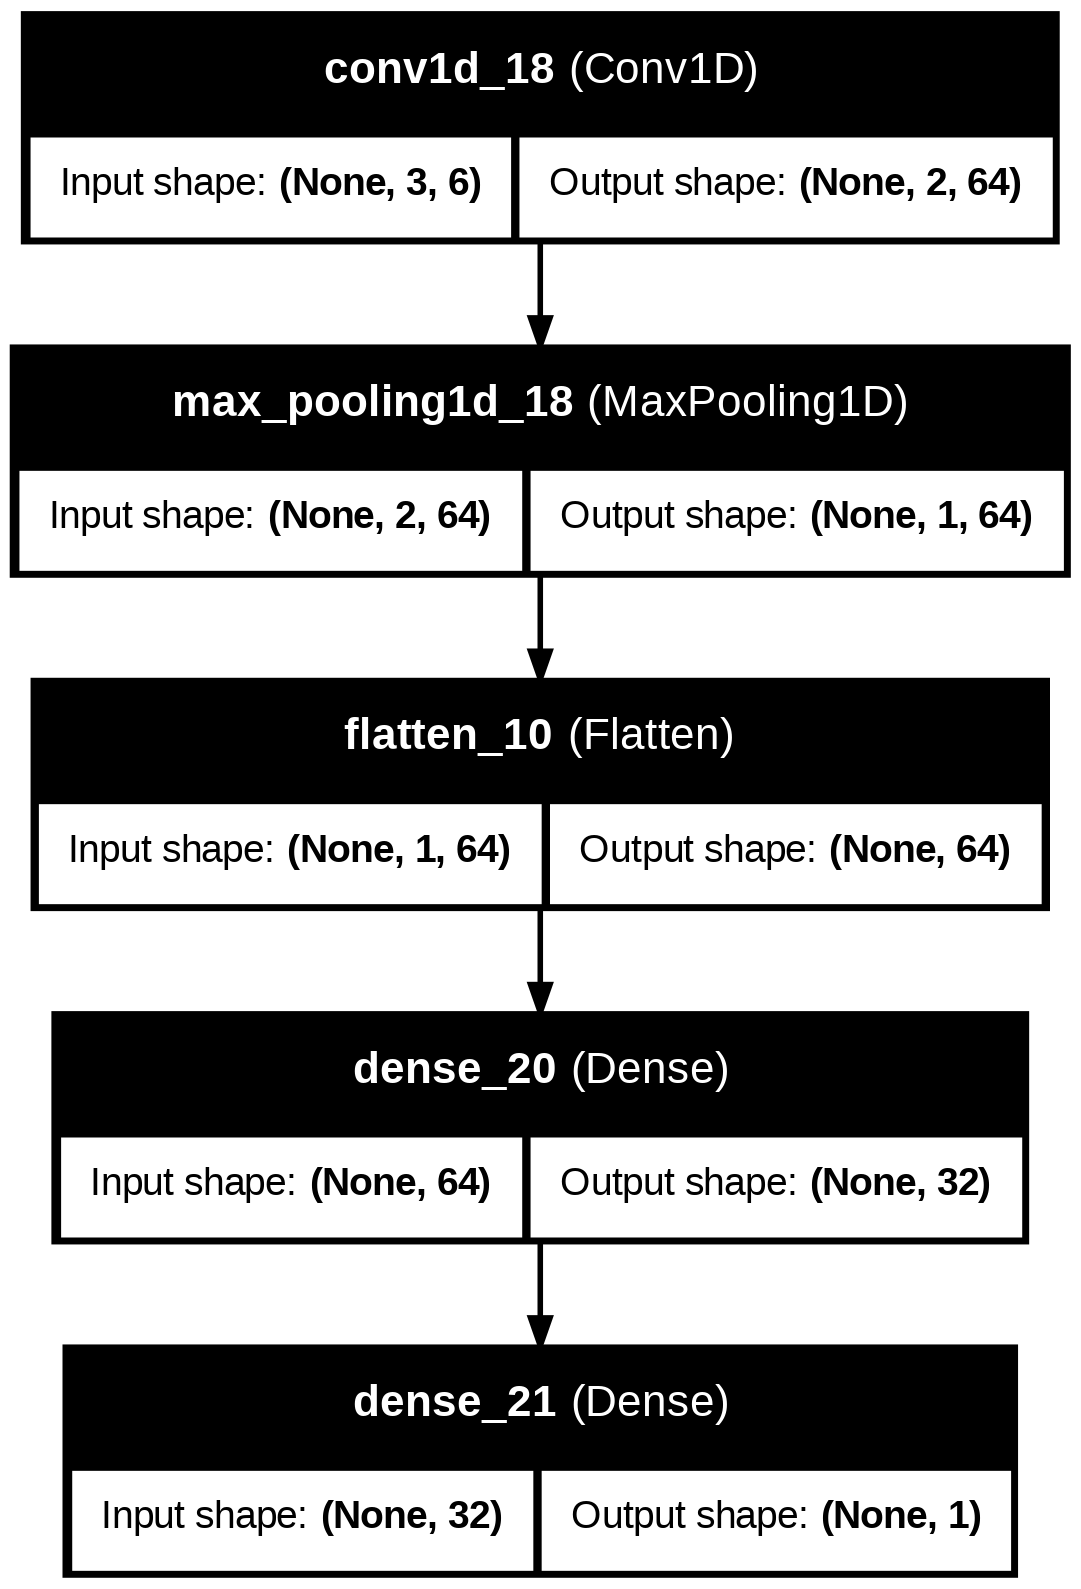

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

Image(filename='model_architecture.png')

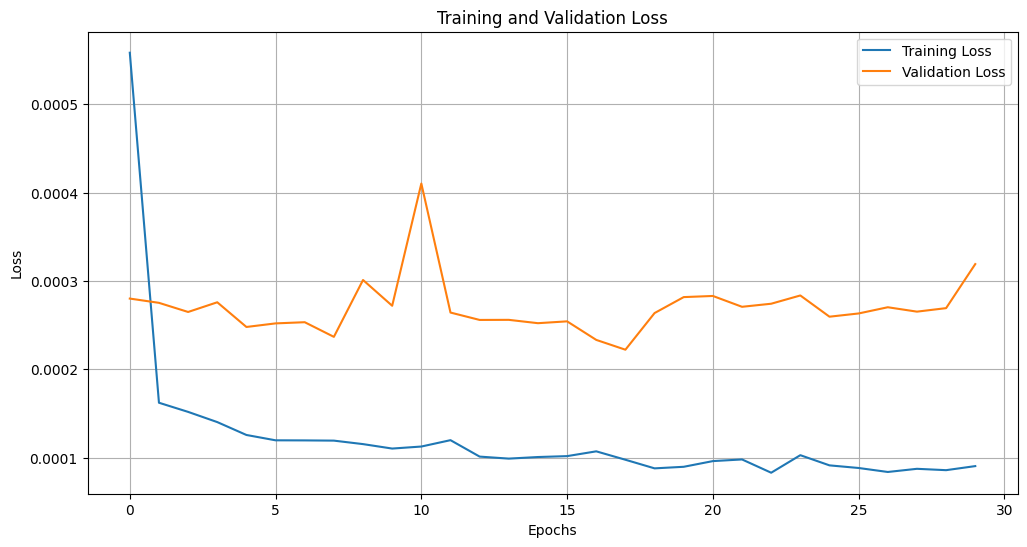

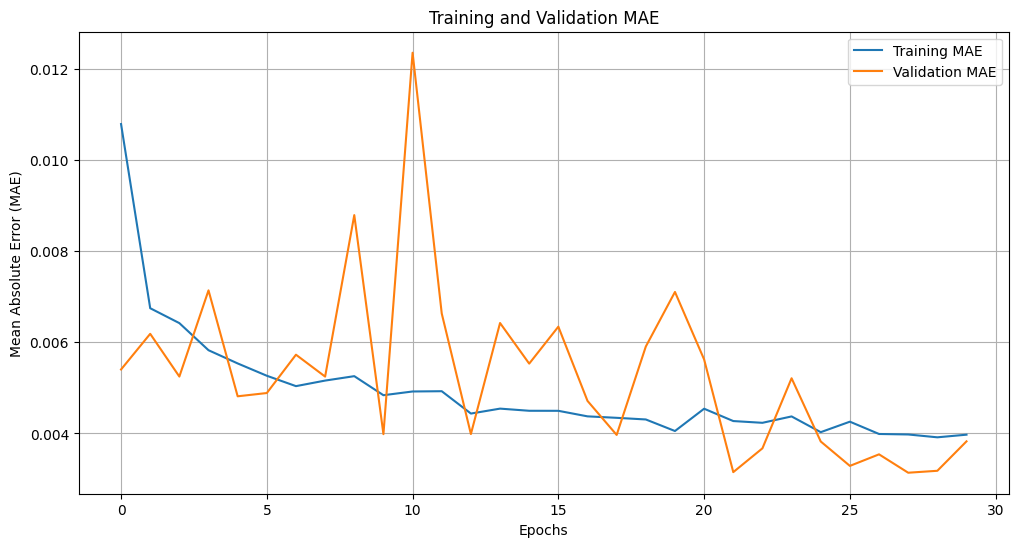

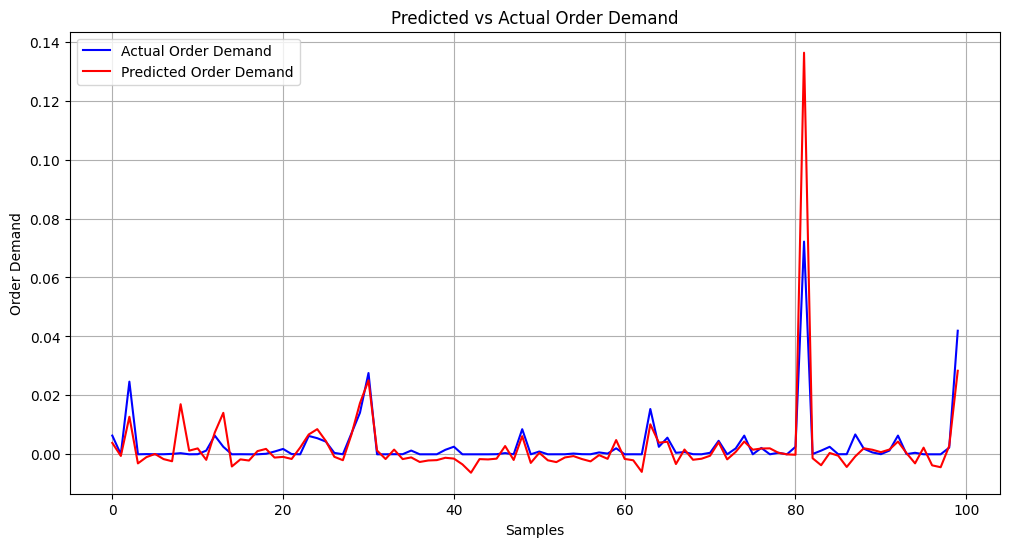

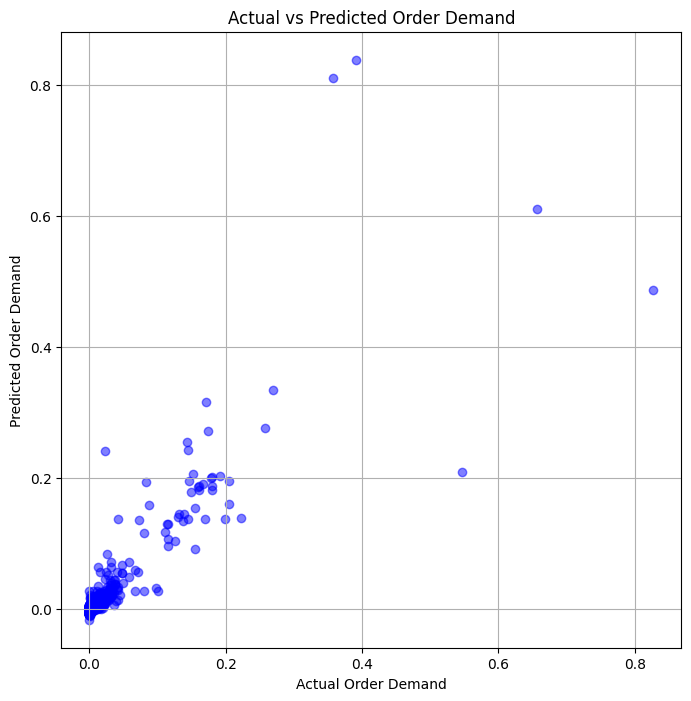

In [ ]:
import matplotlib.pyplot as plt

# 1. Plot the training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot the training and validation MAE (Mean Absolute Error) over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot Predictions vs Actuals (Test Data)
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual Order Demand', color='blue')  # Plot actual values for the first 100 samples
plt.plot(y_pred[:100], label='Predicted Order Demand', color='red')  # Plot predicted values for the first 100 samples
plt.title('Predicted vs Actual Order Demand')
plt.xlabel('Samples')
plt.ylabel('Order Demand')
plt.legend()
plt.grid(True)
plt.show()

# 4. Plot a scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Actual vs Predicted Order Demand')
plt.xlabel('Actual Order Demand')
plt.ylabel('Predicted Order Demand')
plt.grid(True)
plt.show()


In [ ]:
print(y_test.shape)
print(y_pred.shape)

(2703,)
(2703, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)                   │ (None, 18, 64)              │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_14 (MaxPooling1D)      │ (None, 9, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 7, 64)               │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,793 (100.75 KB)

 Trainable params: 25,793 (100.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3847.1973 - mae: 15.7349 - val_loss: 0.0503 - val_mae: 0.1665
Epoch 2/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0629 - mae: 0.1947 - val_loss: 0.0598 - val_mae: 0.2187
Epoch 3/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1035 - mae: 0.2382 - val_loss: 0.5044 - val_mae: 0.6759
Epoch 4/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8816 - mae: 0.9101 - val_loss: 20.8838 - val_mae: 4.4809
Epoch 5/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.4635 - mae: 1.7031 - val_loss: 0.0895 - val_mae: 0.2387
Epoch 6/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.1167 - mae: 0.5236 - val_loss: 0.0173 - val_mae: 0.1038
Epoch 7/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0306 - mae: 0.1278 - val_loss: 0.0961 - val_mae: 0.2838
Epoch 8/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5849 - mae: 0.4712 - val_loss: 0.1049 - val_mae: 0.2313
Epoch 9/30
988/988 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step

In [ ]:

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(np.column_stack([y_pred, np.zeros(len(y_pred))]))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.column_stack([y_test, np.zeros(len(y_test))]))[:, 0]
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
from sklearn.metrics import r2_score
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {rmse}")
print(f"R² Score: {r2}")


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - mae: 0.0077
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MAE: 0.007061868906021118
Test RMSE: 0.039805743169152835
R² Score: -0.008706191511540728


In [ ]:

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")

y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(np.concatenate([y_pred, np.zeros_like(y_pred)], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros_like(y_test.reshape(-1, 1))], axis=1))[:, 0]

print("Predictions:", y_pred)
print("Actual Values:", y_test_actual)

In [ ]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_scaled.shape)
# print(X_scaled_fit.shape)

In [ ]:
# from sklearn.metrics import mean_absolute_error

# # Calculate metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)  # Calculate RMSE
# r2 = r2_score(y_test, y_pred)

# # Print the metrics
# print(f'Mean Absolute Error (MAE): {mae}')
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'Root Mean Squared Error (RMSE): {rmse}')
# print(f'R^2 Score: {r2}')

In [ ]:
# # Step 1: Group by 'Product_Code' and calculate mean 'Order_Demand'
# mean_order_demand = df.groupby('Product_Code')['Order_Demand'].mean().reset_index()
# mean_order_demand = mean_order_demand.rename(columns={'Order_Demand': 'Product_Mean_Demand'})

# # Merge the mean order demand back to the original dataframe
# df = df.merge(mean_order_demand, on='Product_Code', how='left')

# # Step 2: Convert categorical variables into numerical ones
# df['Product_Code'] = pd.factorize(df['Product_Code'])[0]
# df['Product_Category'] = pd.factorize(df['Product_Category'])[0]
# df['Warehouse'] = pd.factorize(df['Warehouse'])[0]

# # Step 3: Define features (X) and target variable (y)
# X = df[['Product_Code', 'Petrol_price', 'Day_Type', 'Year', 'Month', 'Product_Mean_Demand']]
# y = df['Order_Demand']



